<a href="https://colab.research.google.com/github/atul219/Retweet-Predictions/blob/master/Retweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data.xlsx


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from keras.callbacks import ModelCheckpoint , EarlyStopping

Using TensorFlow backend.


**Load Data**

In [0]:
data = pd.read_excel('data.xlsx' , index_col = 0)

**Functions to perform basic tasks **

In [0]:
# check nan 
def check_nan(data):
    return data.isna().sum()
  

def drop_nan(data):
    data = data.dropna(axis = 1)
    return data
  

def col(data):
    return list(data.columns.values)
  

def normalization(X):
    X = (X - np.min(X , axis = 0)) / (np.max(X , axis = 0) - np.min(X , axis = 0))
    return X
  
  
def random_shuffle(X , y):
    idx = np.random.permutation(len(X))
    X,y = X[idx] , y[idx]
    return X,y
  

def train_test_split(X, y, test_size):
    i = int(len(X) * test_size)
    X_test = X[0:i , :]
    y_test = y[0:i , :]
    X_train = X[i: , :]
    y_train = y[i: , :]

    return X_train , X_test , y_train , y_test

**Extract columns**

In [0]:
clean_data = data[['TweetRetweetFlag','TweetRetweetCount','TweetFavoritesCount' , 'UserFollowersCount', 'UserFriendsCount', 'UserListedCount' , 'MacroIterationNumber' ]]

In [0]:
# replace True by 1 and False by 0
clean_data = clean_data.replace([False , True], [0,1])

**Extract Feature Vector and Labels**

In [0]:
X = np.array(clean_data[['TweetRetweetFlag','TweetFavoritesCount' , 'UserFollowersCount', 'UserFriendsCount', 'UserListedCount' , 'MacroIterationNumber']])
y = np.array(clean_data[['TweetRetweetCount']])

**Split the Data into training and testing**

In [0]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

In [10]:
model = Sequential()
model.add(Dense(output_dim = 32  , activation = 'relu' , input_dim = 6))
model.add(Dense(output_dim = 64 , activation = 'relu'))
model.add(Dense(output_dim = 64 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dim = 128 , activation = 'relu'))
model.add(Dense(output_dim = 1))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=6, units=32)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  import sys


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                224       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 14,945
Trainable params: 14,945
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [13]:

#Make new directory 
#!mkdir dir_name #to make new dir. in current directory 
!mkdir Weights
!mkdir /content/Weights

mkdir: cannot create directory ‘/content/Weights’: File exists


In [0]:
# define checkpoints
file_path = '/content/Weights/weights-improvement-{epoch:02d}-{loss:.4f}.hdf5'
checkpoint = ModelCheckpoint(file_path , monitor = 'val_loss' , verbose = 1 , save_best_only = True , mode = 'min')


In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

In [0]:
callback_list = [checkpoint , es]

**Train the model**

In [17]:
history = model.fit(X_train , y_train , validation_split = 0.33 ,  epochs = 100 , shuffle = True , callbacks = callback_list)

Instructions for updating:
Use tf.cast instead.
Train on 22709 samples, validate on 11186 samples
Epoch 1/100
22709/22709 [==============================] - 7s 293us/step - loss: 3559353.9338 - val_loss: 2539015.6310

Epoch 00001: val_loss improved from inf to 2539015.63101, saving model to /content/Weights/weights-improvement-01-3559353.9338.hdf5
Epoch 2/100
22709/22709 [==============================] - 4s 177us/step - loss: 7010237.7386 - val_loss: 2497203.7058

Epoch 00002: val_loss improved from 2539015.63101 to 2497203.70581, saving model to /content/Weights/weights-improvement-02-7010237.7386.hdf5
Epoch 3/100
22709/22709 [==============================] - 4s 177us/step - loss: 1231237.7467 - val_loss: 643634.9889

Epoch 00003: val_loss improved from 2497203.70581 to 643634.98887, saving model to /content/Weights/weights-improvement-03-1231237.7467.hdf5
Epoch 4/100
22709/22709 [==============================] - 4s 177us/step - loss: 858195.8153 - val_loss: 403126.1944

Epoch 0000

In [0]:
y_pred = model.predict(X_test)

In [19]:
y_pred

array([[   5.0358286],
       [   8.949352 ],
       [  49.90923  ],
       ...,
       [2415.5117   ],
       [1237.0247   ],
       [ 746.0865   ]], dtype=float32)

In [20]:
y_test

array([[   1],
       [   1],
       [   0],
       ...,
       [2973],
       [ 111],
       [ 111]])

In [0]:
error = np.sqrt(np.mean(np.square(y_test - y_pred)))

In [22]:
error

413.0556723550181

Text(0.5, 0, 'epoch')

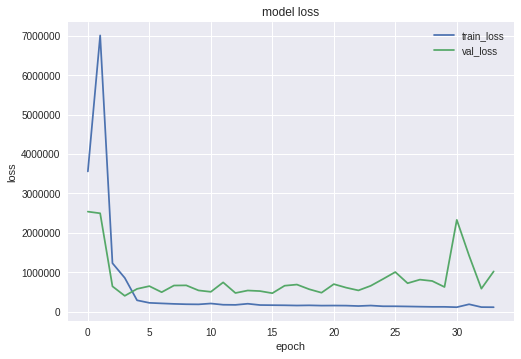

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['train_loss' , 'val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

In [0]:
weights = '/content/Weights/weights-improvement-04-858195.8153.hdf5'
model.load_weights(weights)
model.save('retweet_prediction_400.hdf5')